In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_excel (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\Tugas\4.Linear Regression\Dataset.xlsx')

x = df.iloc[:, 2:8]
y = df.iloc[:, 1:2]

x = preprocessing.scale(x)
y = preprocessing.scale(y)

# x = x.to_numpy()
# y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

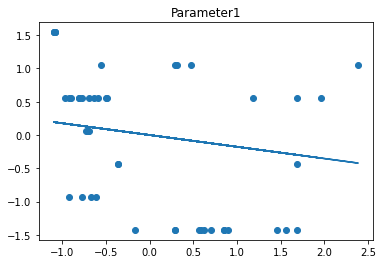

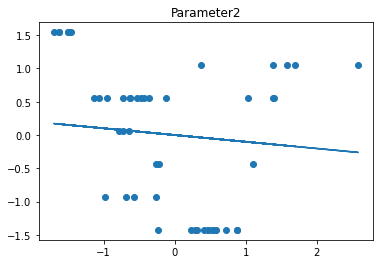

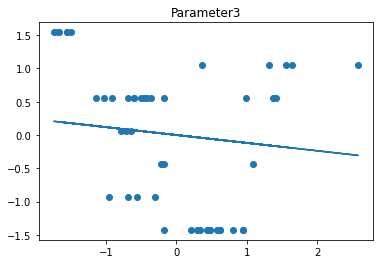

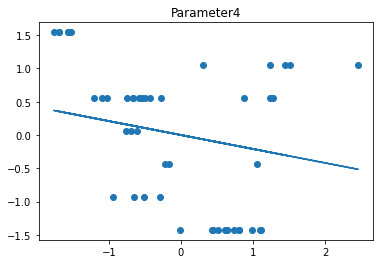

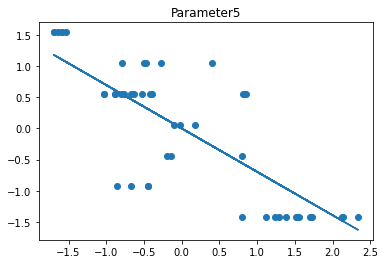

In [14]:
#Linear Regressiuon for each parameter
lr = linear_model.LinearRegression(normalize=True)

r2 = []
rmse = []

for i in range(0,5):
    X = x[:,i]
    X = X.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(

    X, y, test_size=0.3, random_state=42)
    lr.fit(X,y)
    y_pred = lr.predict(x_test)

    score_r2 = lr.score(x_train, y_train)
    score_rmse = mean_squared_error(y_test,y_pred,squared=False)
    r2.append((i+1, score_r2))
    rmse.append((i+1, score_rmse))

    #Plot Linear
    fig, ax = plt.subplots()
    ax.scatter(x_test,y_test);
    ax.plot(x_test, y_pred);
    title = "Parameter" + str((i+1))
    ax.set(title=title);

r2 = np.asarray(r2)
rmse = np.asarray(rmse)  

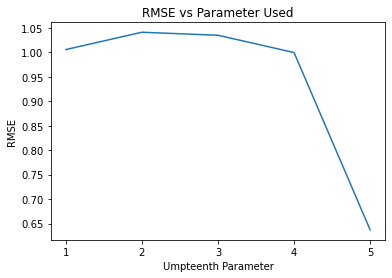

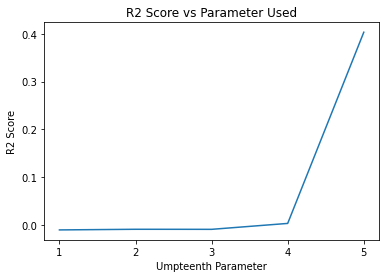

In [15]:
fig, ax = plt.subplots()
ax.plot(rmse[:,0], rmse[:,1]);
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Umpteenth Parameter', ylabel='RMSE', title='RMSE vs Parameter Used');

fig, ax = plt.subplots()
ax.plot(r2[:,0], r2[:,1]);
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Umpteenth Parameter', ylabel='R2 Score', title='R2 Score vs Parameter Used');

In [16]:
#Multiple Linear Regression
mlr = linear_model.LinearRegression(normalize=True)
mlr.fit(x,y)
y_pred = mlr.predict(x_test)

print('R2 Score : %.2f' % mlr.score(x_train, y_train))
print('RMSE : %.2f'% mean_squared_error(y_test,y_pred,squared=False))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)